In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path = 'eeg_data.csv'
D = 178

In [3]:
data = pd.read_csv(path)

In [4]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,121,135,148,143,116,86,68,59,55,3


In [5]:
X = np.array(data.iloc[:,:D])
y = np.array(data.iloc[:, D])
yy = list(y)
print(X.shape, y.shape)

(11500, 178) (11500,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [9]:
C_range = [1, 10, 100, 1000]
# gamma_range = [1, 0.1, 0.01, 0.001]
# degree_range =[3]
gamma_range = [1]
degree_range = [1]
param_grid = {'C': C_range, 'gamma': gamma_range, 'degree':degree_range, 'kernel': ['linear']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END C=1, degree=1, gamma=1, kernel=linear;, score=0.277 total time=  43.0s
[CV 2/5] END C=1, degree=1, gamma=1, kernel=linear;, score=0.276 total time=  48.7s
[CV 3/5] END C=1, degree=1, gamma=1, kernel=linear;, score=0.274 total time=  51.9s
[CV 4/5] END C=1, degree=1, gamma=1, kernel=linear;, score=0.268 total time=  51.8s
[CV 5/5] END C=1, degree=1, gamma=1, kernel=linear;, score=0.289 total time=  52.9s


In [16]:
res = grid.cv_results_['mean_test_score']
# res = res.reshape((len(C_range), len(gamma_range)))
res

array([[0.37271739, 0.39956522, 0.29684783, 0.21684783],
       [0.37304348, 0.39065217, 0.3301087 , 0.23728261],
       [0.37304348, 0.37619565, 0.3823913 , 0.26130435],
       [0.37304348, 0.37271739, 0.39956522, 0.29684783]])

Text(0.5, 1.0, 'Gaussian RBF Training accuracy after cross validated grid search')

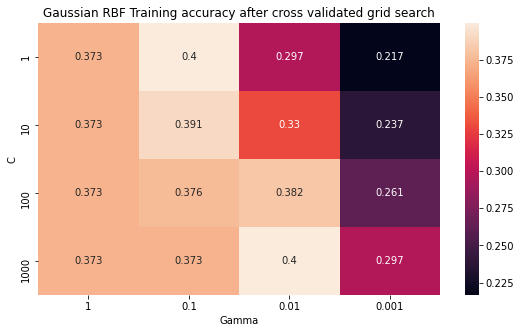

In [17]:
plt.figure(figsize=(9, 5))
sns.heatmap(res, annot=True, fmt='.3g', xticklabels=gamma_range, yticklabels=C_range)
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Gaussian RBF Training accuracy after cross validated grid search")

In [18]:
grid.best_estimator_.fit(X_train, y_train)

SVC(C=1, gamma=0.1, kernel='poly')

In [19]:
grid.best_estimator_.score(X_train, y_train)

0.8744565217391305

In [20]:
grid.best_estimator_.score(X_test, y_test)

0.40869565217391307

In [21]:
grid.best_estimator_.n_support_

array([1229, 1622, 1703, 1715, 1808])

In [9]:
clf = SVC(C = 1, kernel="linear")
clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [10]:
clf.score(X_train, y_train)

0.3353260869565217

In [11]:
clf.score(X_test, y_test)

0.26608695652173914

In [12]:
y_pred = clf.predict(X_test)

<AxesSubplot:>

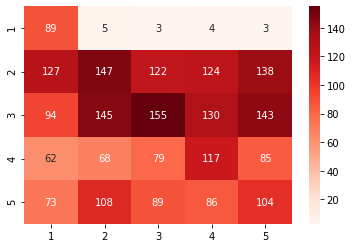

In [13]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='.3g', cmap='Reds', xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])